# Trabajo práctico integrador - Análisis de Datos

#### Alumnos: Matias Werbin, Noelia Qualindi
##### Cohorte 14 - 1er Bimestre - Año 2024

## Importación de librerias a utilizar en el analisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Análisis explotario inicial

El archivo csv que se utilizará en este TP integrador fue descargado de la siguiente url: "https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv"

### Creación de dataframe aus_weather

In [2]:
aus_weather = pd.read_csv("./weather_aus.csv")


### Inspección del dataframe aus_wer

In [3]:
aus_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
print('La forma del datafram es:', aus_weather.shape) # forma del dataframe
print('La longitud o cantidad de filas (registros) del dataframe es:',len(aus_weather)) # Equivalente aus_weather.shape[0]
print('La cantidad de columnas en el dataframe es:', aus_weather.shape[1])
print('El índice del DataFrame:', aus_weather.index)


La forma del datafram es: (145460, 23)
La longitud o cantidad de filas (registros) del dataframe es: 145460
La cantidad de columnas en el dataframe es: 23
El índice del DataFrame: RangeIndex(start=0, stop=145460, step=1)


### Descripción y análisis variables:

#### Descripción de los Datos
- **Date**: Fecha del registro
- **Location**: Nombre de la ciudad de Australia.
- **MinTemp**: Temperatura mínima durante un día específico. (grados Celsius)
- **MaxTemp**: Temperatura máxima durante un día específico. (grados Celsius)
- **Rainfall**: Lluvia durante un día específico. (milímetros)
- **Evaporation**: Evaporación durante un día específico. (milímetros)
- **Sunshine**: Horas de sol brillante durante un día específico. (horas)
- **WindGusDir**: La dirección de la ráfaga más fuerte durante un día específico. (16 puntos cardinales)
- **WindGuSpeed**: Velocidad de la ráfaga más fuerte durante un día específico. (kilómetros por hora)
- **WindDir9am**: La dirección del viento 10 minutos antes de las 9 am. (puntos cardinales)
- **WindDir3pm**: La dirección del viento 10 minutos antes de las 3 pm. (puntos cardinales)
- **WindSpeed9am**: Velocidad del viento 10 minutos antes de las 9 am. (kilómetros por hora)
- **WindSpeed3pm**: Velocidad del viento 10 minutos antes de las 3 pm. (kilómetros por hora)
- **Humidity9am**: Humedad del viento a las 9 am. (porcentaje)
- **Humidity3pm**: Humedad del viento a las 3 pm. (porcentaje)
- **Pressure9am**: Presión atmosférica a las 9 am. (hectopascales)
- **Pressure3pm**: Presión atmosférica a las 3 pm. (hectopascales)
- **Cloud9am**: Porcentaje de cielo cubierto por nubes a las 9 am. (octavos)
- **Cloud3pm**: Porcentaje de cielo cubierto por nubes a las 3 pm. (octavos)
- **Temp9am**: Temperatura a las 9 am. (grados Celsius)
- **Temp3pm**: Temperatura a las 3 pm. (grados Celsius)
- **RainToday**: Si hoy llueve entonces 'Sí'. Si hoy no llueve entonces 'No'.
- **RainTomorrow**: Si mañana llueve entonces 1 (Sí). Si mañana no llueve entonces 0 (No).


In [5]:
# Para visualizarlas en pyhton:
columnas=aus_weather.columns

print("Las columnas/variebales del dataframe son:")
print("")
for i in columnas:
    print(i)

Las columnas/variebales del dataframe son:

Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RainTomorrow


#### Revisión de tipos de datos de cada atributo

**Con el metodo .info() de pandas podemos tener visión general rápida y útil de la estructura y la integridad de los datos en el DataFrame (indices, números de columnas, tipo de datos y cantidad de valores no nulos en cada columna)**

In [6]:

aus_weather.info() # se puede observar 145460 registros, 23 columnas y que en muchas columnas tenemos valores ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Alternativamente, lo podemos ver con un bucle for recorriendo columnas (aca solo vemos el tipo de datos)**

In [7]:

for i in columnas:
    print(f"El tipo de dato de la columna {i} es {type(aus_weather[i].iloc[0]).__name__}")


El tipo de dato de la columna Date es str
El tipo de dato de la columna Location es str
El tipo de dato de la columna MinTemp es float64
El tipo de dato de la columna MaxTemp es float64
El tipo de dato de la columna Rainfall es float64
El tipo de dato de la columna Evaporation es float64
El tipo de dato de la columna Sunshine es float64
El tipo de dato de la columna WindGustDir es str
El tipo de dato de la columna WindGustSpeed es float64
El tipo de dato de la columna WindDir9am es str
El tipo de dato de la columna WindDir3pm es str
El tipo de dato de la columna WindSpeed9am es float64
El tipo de dato de la columna WindSpeed3pm es float64
El tipo de dato de la columna Humidity9am es float64
El tipo de dato de la columna Humidity3pm es float64
El tipo de dato de la columna Pressure9am es float64
El tipo de dato de la columna Pressure3pm es float64
El tipo de dato de la columna Cloud9am es float64
El tipo de dato de la columna Cloud3pm es float64
El tipo de dato de la columna Temp9am es 

**El anterior código refleja el tipo de datos segun python. Ahora, clasificaremos las variables segun si son CUALITATIVAS o CUANTITAVIAS:**

- **Date**: Cualitativa-Ordinal
- **Location**: Cualitativa-Nominal
- **MinTemp**: Cuantitativa-Continua (de intervalo)
- **MaxTemp**: Cuantitativa-Continua (de intervalo)
- **Rainfall**: Cuantitativa-Continua (de razón)
- **Evaporation**: Cuantitativa-Continua (de razón)
- **Sunshine**: Cuantitativa-Continua (de razón)
- **WindGusDir**: Cualitativa-Nominal
- **WindGusSpeed**: Cuantitativa-Continua (de razón)
- **WindDir9am**: Cuantitativa-Continua (de razón)
- **WindDir3pm**: Cualitativa-Nominal
- **WindSpeed9am**: Cuantitativa-Continua (de razón)
- **WindSpeed3pm**: Cuantitativa-Continua (de razón)
- **Humidity9am**: Cuantitativa-Continua (de razón)
- **Humidity3pm**: Cuantitativa-Continua (de razón)
- **Pressure9am**: Cuantitativa-Continua (de razón)
- **Pressure3pm**: Cuantitativa-Continua (de razón)
- **Cloud9am**: Cuantitativa-Continua (de razón)
- **Cloud3pm**: Cuantitativa-Continua (de razón)
- **Temp9am**: Cuantitativa-Continua (de intervalo)
- **Temp3pm**: Cuantitativa-Continua (de intervalo)
- **RainToday**: Cualitativa-Nominal
- **RainTomorrow**: Cualitativa-Nominal (Variable de Salida o respuesta)




**Para visualizar la cantidad de valores ausentes en cada columna:**

In [8]:
aus_weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Para visualizar la cantidad de valores ausentes en todo el dataset**

In [9]:
total_nan=aus_weather.isna().sum().sum()

print("En el dataset se encuentran un total", total_nan, "de valores ausentes")

En el dataset se encuentran un total 343248 de valores ausentes


**También, hay que analizar que porcentaje del total corresponde a valores nan o ausentes. Esto es clave para analizar que estregia se va tomar para imputar estos como con la columna que los contiene**

In [10]:
df_nan=aus_weather.isnull().sum().reset_index()
df_nan.columns=['Variable','Cant NaN']
df_nan ['Porc NaN']= round(df_nan['Cant NaN']/aus_weather.shape[0] * 100,2)

df_nan

,Variable,Cant NaN,Porc NaN
0,Date,0,0.00
1,Location,0,0.00
2,MinTemp,1485,1.02
3,MaxTemp,1261,0.87
4,Rainfall,3261,2.24
5,Evaporation,62790,43.17
6,Sunshine,69835,48.01
7,WindGustDir,10326,7.10
8,WindGustSpeed,10263,7.06
9,WindDir9am,10566,7.26


/var/folders/hw/ns58kp4d2bs0v9klnqn0n9rc0000gn/T/ipykernel_66249/240352859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_nan, x='Variable', y='Cant NaN', palette='coolwarm')


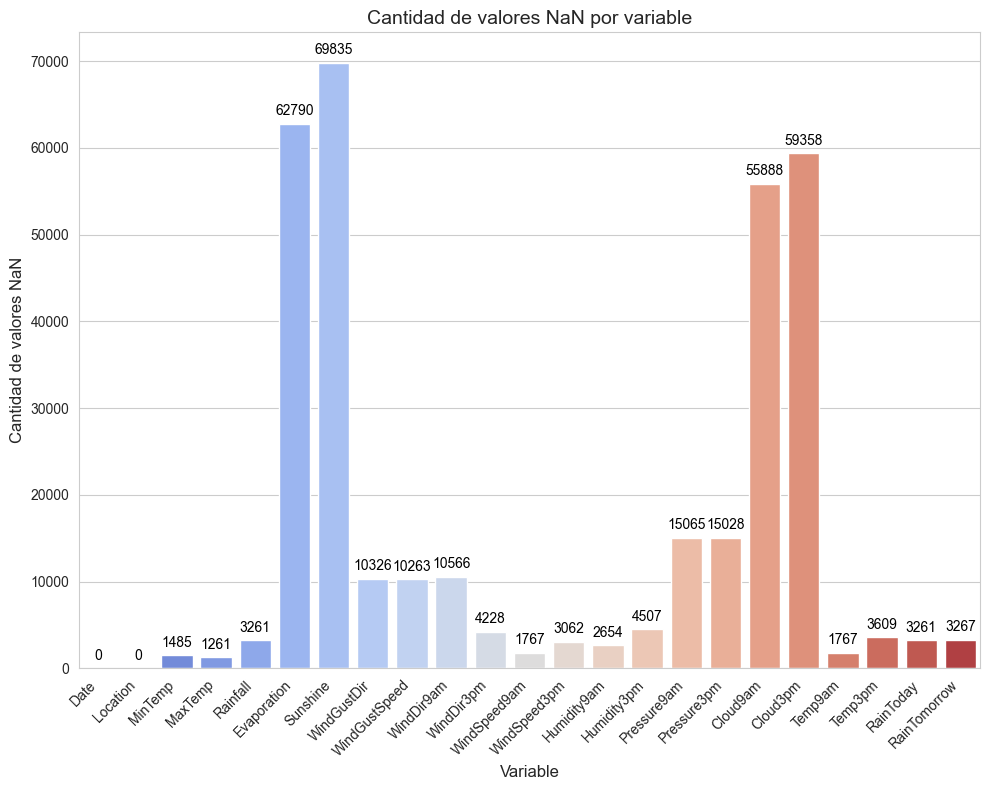

In [11]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

barplot = sns.barplot(data=df_nan, x='Variable', y='Cant NaN', palette='coolwarm')
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Cantidad de valores NaN', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10)  
plt.title('Cantidad de valores NaN por variable', fontsize=14)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=10,
                     color='black')

plt.tight_layout()
plt.show()


### Medidas de Resumen

**Algunas pueden ser:**

- **Tendencia central**: media, mediana, moda
- **Dispersion**: desviación estandar, varianza, rango, percentiles
- **Forma**: asimetria, curtosis

**Muchas de estas, pueden ser calculadas rapidamente con el metodo .describe(). Informaremos las mismas de dos maneras:**

1) .describe()
2) Uso de funciones puntuales

**1) .describe()** : El método nos devuelve de cada variable númerica la cantidad, media, desviación estándar,mínimo, q1, q2 o mediana, q3 y maximo. Si lo vemos bien, aun nos da mas información, ya que podemos sacar el rango como rango=max-min y IQR como IQR=q3-q1

In [12]:
aus_weather.describe() 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**2) Uso de funciones puntuales:** en este punto eligiremos 5 primeras variables numericas y usaremos funciones de numpy o pandas para obtener distintas medidas de resumen

**2.1) Medidas de tendencia central**

In [13]:
print('Medias')
print('')
print(f'Media de MinTemp: {aus_weather.MinTemp.mean():.2f}')
print(f'Media de MaxTemp: {aus_weather.MaxTemp.mean():.2f}')
print(f'Media de Rainfall: {np.mean(aus_weather.Rainfall):.2f}')
print(f'Media de Evaporation: {np.mean(aus_weather.Evaporation):.2f}')
print(f'Media de Sunshine: {aus_weather.Sunshine.mean():.2f}')
print('')

print('Medianas')
print('')
print(f'Mediana de MinTemp: {aus_weather.MinTemp.median():.2f}')
print(f'Mediana de MaxTemp: {aus_weather.MaxTemp.median():.2f}')
print(f'Mediana de Rainfall: {aus_weather.Rainfall.median():.2f}')
print(f'Mediana de Evaporation: {aus_weather.Evaporation.median():.2f}')
print(f'Mediana de Sunshine: {aus_weather.Sunshine.median():.2f}')



Medias

Media de MinTemp: 12.19
Media de MaxTemp: 23.22
Media de Rainfall: 2.36
Media de Evaporation: 5.47
Media de Sunshine: 7.61

Medianas

Mediana de MinTemp: 12.00
Mediana de MaxTemp: 22.60
Mediana de Rainfall: 0.00
Mediana de Evaporation: 4.80
Mediana de Sunshine: 8.40


**2.2) Medidas de Dispersión**

In [17]:
print('Estadísticas de Resumen')
print('')

# Desviación Estándar
print('Desviación Estándar')
print('')
print(f'Desviación estándar de MinTemp: {aus_weather.MinTemp.std():.2f}')
print(f'Desviación estándar de MaxTemp: {aus_weather.MaxTemp.std():.2f}')
print(f'Desviación estándar de Rainfall: {np.std(aus_weather.Rainfall):.2f}')
print(f'Desviación estándar de Evaporation: {np.std(aus_weather.Evaporation):.2f}')
print(f'Desviación estándar de Sunshine: {aus_weather.Sunshine.std():.2f}')
print('')

# Varianza
print('Varianza')
print('')
print(f'Varianza de MinTemp: {aus_weather.MinTemp.var():.2f}')
print(f'Varianza de MaxTemp: {aus_weather.MaxTemp.var():.2f}')
print(f'Varianza de Rainfall: {np.var(aus_weather.Rainfall):.2f}')
print(f'Varianza de Evaporation: {np.var(aus_weather.Evaporation):.2f}')
print(f'Varianza de Sunshine: {aus_weather.Sunshine.var():.2f}')
print('')

# Rango
print('Rango')
print('')
print(f'Rango de MinTemp: {aus_weather.MinTemp.max() - aus_weather.MinTemp.min():.2f}')
print(f'Rango de MaxTemp: {aus_weather.MaxTemp.max() - aus_weather.MaxTemp.min():.2f}')
print(f'Rango de Rainfall: {aus_weather.Rainfall.max() - aus_weather.Rainfall.min():.2f}')
print(f'Rango de Evaporation: {aus_weather.Evaporation.max() - aus_weather.Evaporation.min():.2f}')
print(f'Rango de Sunshine: {aus_weather.Sunshine.max() - aus_weather.Sunshine.min():.2f}')
print('')

# Cuantiles
print('Cuantiles')
print('')

variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']
# cuantiles para cada variable 
for var in variables:
    print(f"Variable: {var}")
    for i in np.arange(0.25, 1, 0.25):
        print(f'Cuantil {i}: {aus_weather[var].quantile(i):.2f}')
    print('')

Estadísticas de Resumen

Desviación Estándar

Desviación estándar de MinTemp: 6.40
Desviación estándar de MaxTemp: 7.12
Desviación estándar de Rainfall: 8.48
Desviación estándar de Evaporation: 4.19
Desviación estándar de Sunshine: 3.79

Varianza

Varianza de MinTemp: 40.94
Varianza de MaxTemp: 50.68
Varianza de Rainfall: 71.88
Varianza de Evaporation: 17.59
Varianza de Sunshine: 14.33

Rango

Rango de MinTemp: 42.40
Rango de MaxTemp: 52.90
Rango de Rainfall: 371.00
Rango de Evaporation: 145.00
Rango de Sunshine: 14.50

Cuantiles

Variable: MinTemp
Cuantil 0.25: 7.60
Cuantil 0.5: 12.00
Cuantil 0.75: 16.90

Variable: MaxTemp
Cuantil 0.25: 17.90
Cuantil 0.5: 22.60
Cuantil 0.75: 28.20

Variable: Rainfall
Cuantil 0.25: 0.00
Cuantil 0.5: 0.00
Cuantil 0.75: 0.80

Variable: Evaporation
Cuantil 0.25: 2.60
Cuantil 0.5: 4.80
Cuantil 0.75: 7.40

Variable: Sunshine
Cuantil 0.25: 4.80
Cuantil 0.5: 8.40
Cuantil 0.75: 10.60



**Balanceo**

Proporción de clases desbalanceadas:
No: 75.84%
Yes: 21.91%
nan: 2.25%


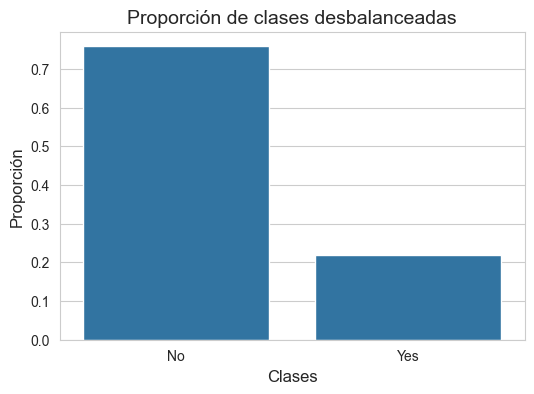

In [15]:
class_proportions = aus_weather['RainTomorrow'].value_counts(normalize=True, dropna=False) # dropna en false para contabilizar los valores NaN
print("Proporción de clases desbalanceadas:")
for label, proportion in class_proportions.items():
    print(f"{label}: {proportion:.2%}")

plt.figure(figsize=(6, 4))
sns.barplot(x=class_proportions.index, y=class_proportions.values)

plt.xlabel('Clases', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.title('Proporción de clases desbalanceadas', fontsize=14)

plt.show()